In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/HandWritten/HandwrittenDataset

/content/drive/MyDrive/HandWritten/HandwrittenDataset


In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2

In [ ]:
def create_dataframe_digits(data_path):
    class_categories = {
        '0': 0,
        '1': 1,
        '2': 2,
        '3': 3,
        '4': 4,
        '5': 5,
        '6': 6,
        '7': 7,
        '8': 8,
        '9': 9,
    }
    image_paths = []
    image_outputs = []
    for category, output in class_categories.items():
        folder_path = os.path.join(data_path, category)      # data_path/category/
        for image in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image)
            image_paths.append(image_path)
            image_outputs.append(output)
    df = pd.DataFrame({
        'path': image_paths,
        'output': image_outputs
    })
    return df


In [ ]:
DATA_PATH='/content/drive/MyDrive/HandWritten/HandwrittenDataset'
train_df=create_dataframe_digits(os.path.join(DATA_PATH,'digits_train_set'))
test_df=create_dataframe_digits(os.path.join(DATA_PATH,'digits_test_set'))


In [ ]:
IMG_DIM=128

def imread(img_path):
    img = cv2.imread(img_path)
    img = img.astype('float32')/255.0
    img = cv2.resize(img, (IMG_DIM, IMG_DIM))
    return img

def imshow(img, figsize=(5, 5)):
    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.show()

def read_images(img_paths):
    n = len(img_paths)
    X = np.zeros((n, IMG_DIM, IMG_DIM, 3), dtype='float32')
    for i in tqdm(range(n)):
        path = img_paths[i]
        img = imread(path)
        X[i] = img
    return X

In [ ]:
x_train=read_images(train_df['path'])
y_train=train_df['output']
x_test=read_images(test_df['path'])
y_test=test_df['output']


100%|██████████| 1414/1414 [07:54<00:00,  2.98it/s]


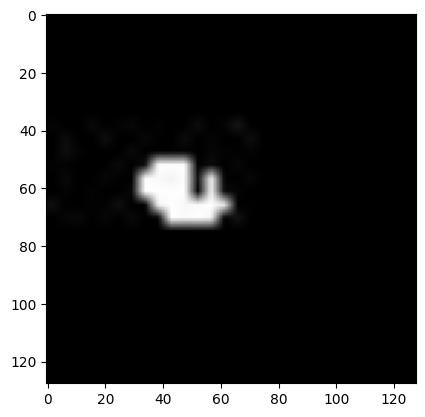

0


In [ ]:
plt.imshow(x_train[20])
plt.show()
print(y_train[20])

In [ ]:
# Load the MobileNetV2 model without the top layers
mobilenetv2_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_DIM, IMG_DIM, 3))


9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
# Freeze all the layers in the pre-trained model
for layer in mobilenetv2_model.layers:
    layer.trainable = False

In [ ]:
# Create a new model and add the pre-trained model as a feature extractor
model = tf.keras.models.Sequential()
model.add(mobilenetv2_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(128, activation ='relu'))
model.add(tf.keras.layers.Dense(128, activation ='relu'))
model.add(tf.keras.layers.Dense(10, activation ='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,439,754
Trainable params: 181,770
Non-tr

In [ ]:
# Train the model with your dataset
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
207/207 [==============================] - 7s 20ms/step - loss: 0.0834 - accuracy: 0.9729
Epoch 2/20
207/207 [==============================] - 5s 22ms/step - loss: 0.0515 - accuracy: 0.9826
Epoch 3/20
207/207 [==============================] - 4s 20ms/step - loss: 0.0378 - accuracy: 0.9879
Epoch 4/20
207/207 [==============================] - 4s 22ms/step - loss: 0.0458 - accuracy: 0.9843
Epoch 5/20
207/207 [==============================] - 5s 23ms/step - loss: 0.0402 - accuracy: 0.9883
Epoch 6/20
207/207 [==============================] - 4s 20ms/step - loss: 0.0418 - accuracy: 0.9859
Epoch 7/20
207/207 [==============================] - 4s 18ms/step - loss: 0.0339 - accuracy: 0.9883
Epoch 8/20
207/207 [==============================] - 4s 19ms/step - loss: 0.0266 - accuracy: 0.9918
Epoch 9/20
207/207 [==============================] - 4s 21ms/step - loss: 0.0583 - accuracy: 0.9793
Epoch 10/20
207/207 [==============================] - 4s 19ms/step - loss: 0.0140 - accura

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)


45/45 [==============================] - 2s 19ms/step - loss: 0.1300 - accuracy: 0.9724
Test accuracy: 0.9724186658859253


In [ ]:
model.save('handwritten.model')

In [ ]:
model = tf.keras.models.load_model('handwritten.model')


In [ ]:
y_pred=model.predict(x_test)

45/45 [==============================] - 3s 22ms/step


In [ ]:
code = {'0':0 ,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9}

def getcode(n):
    for x , y in code.items():
        if n == y:
            return x


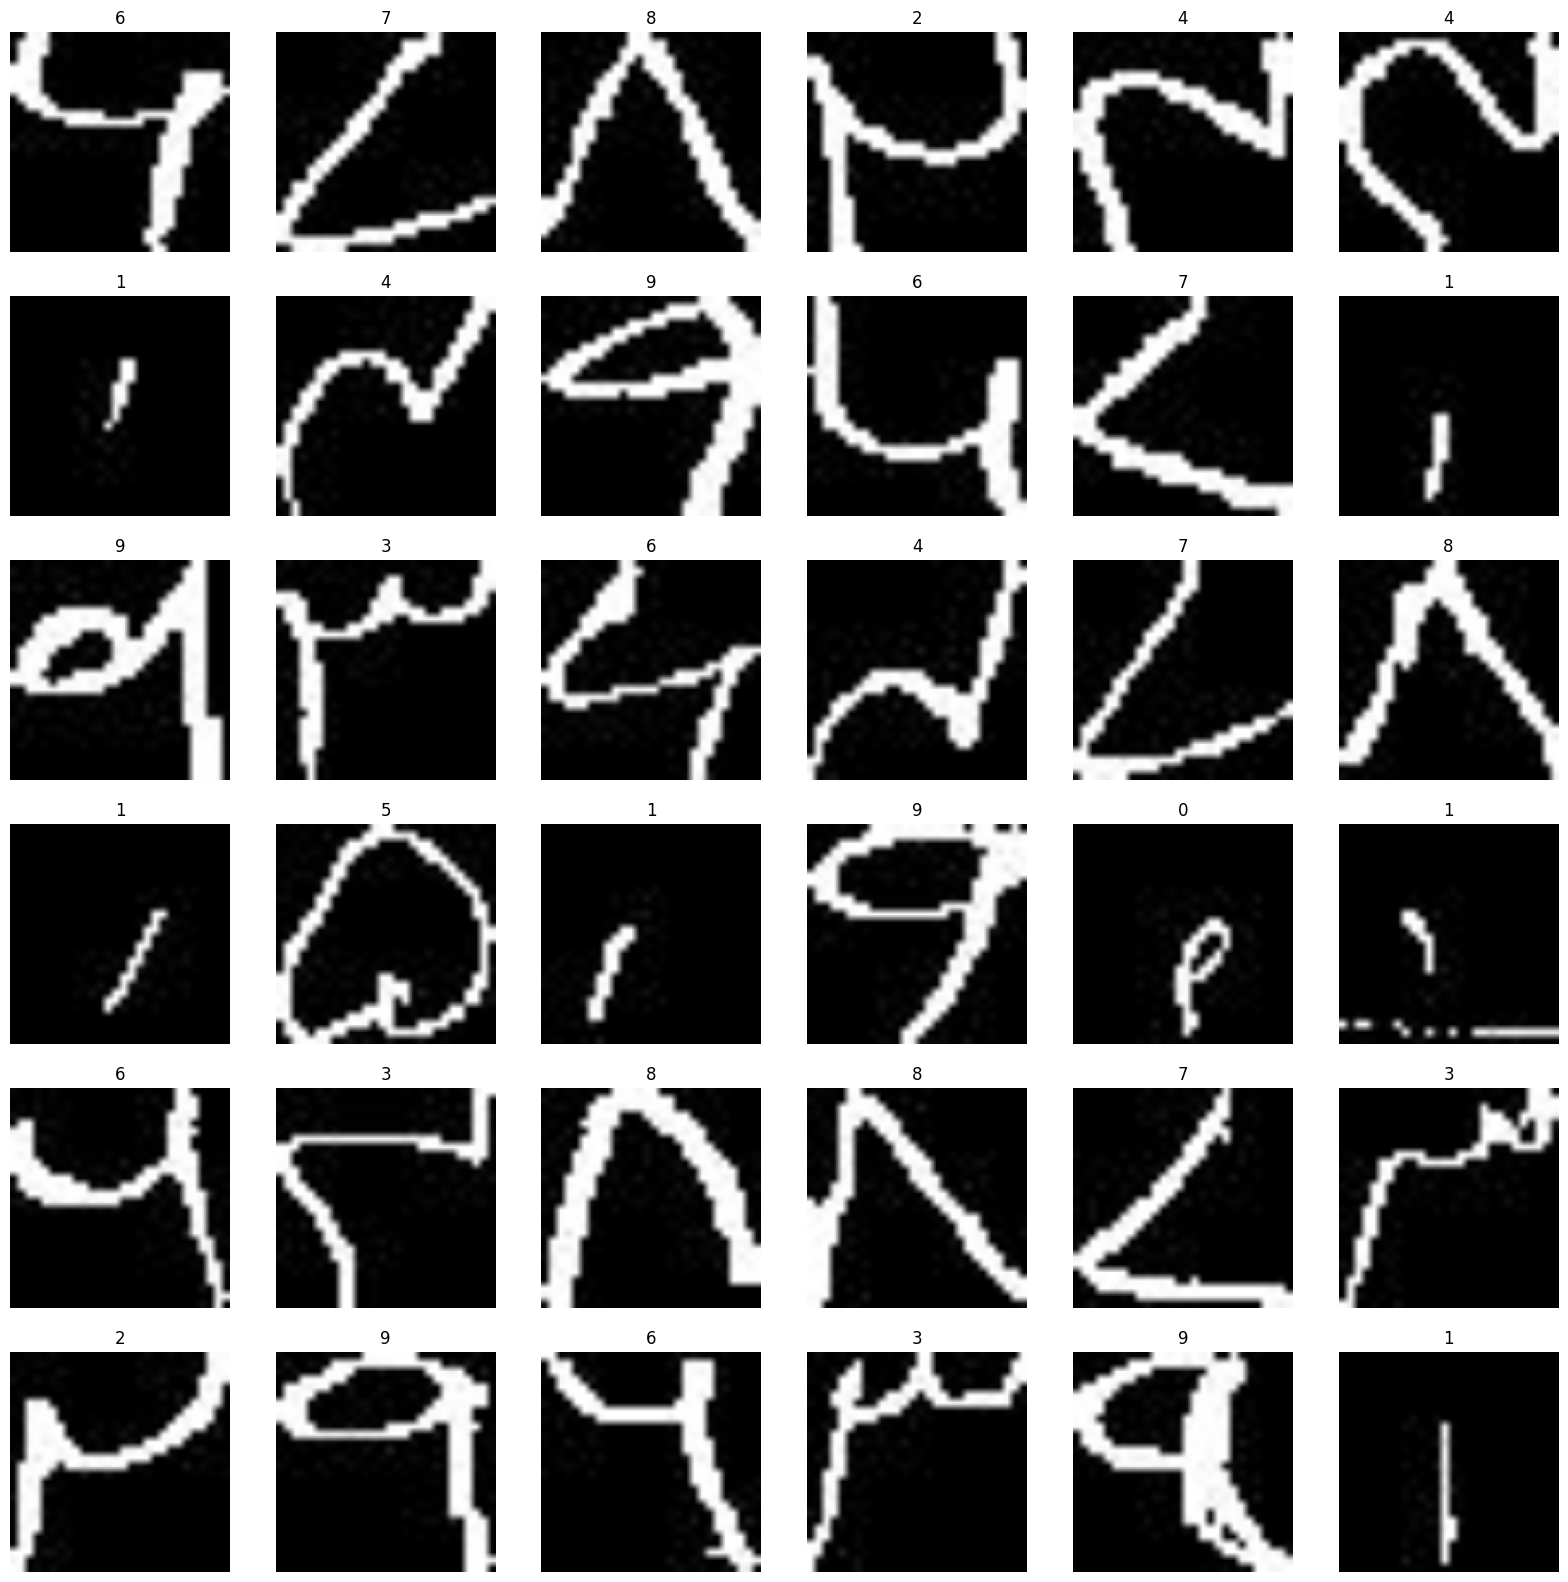

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_test[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_pred[i])))